# Enhancing Food Classification with Two-Stage Transfer Learning Using EfficientNet - Food Vision Milestone Project 🍔👁

In this project, I will train and fine-tune a neural network on the [food101](https://www.kaggle.com/datasets/dansbecker/food-101) dataset.

**The goal is to beat the [Deepfood](https://www.researchgate.net/publication/304163308_DeepFood_Deep_Learning-Based_Food_Image_Recognition_for_Computer-Aided_Dietary_Assessment)**: a 2016 paper which used a convolutional neural network trained for 2-3 days to achieve 77.4% top-1 accuracy.

This project is the first milestone project of [TensorFlow for Deep Learning Bootcamp](https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/?couponCode=OF53124) course.

You can find the materials for the course using this link: https://github.com/mrdbourke/tensorflow-deep-learning


----

What I am going to do in this notebook:
* Batching & preparing the data for modelling
* Creating modelling callbacks
* Building a feature extraction model
* Fine-tunning the feature extraction model
* Viewing training results on tensorboard
* Doing more analysis on the results using confusion matrix and graphing tools


In [ ]:
# On Lenevo
%cd /home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision
# !pwd

/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision


### Get helper functions File

You can find the helper functions file in the GitHub page: https://github.com/mrdbourke/tensorflow-deep-learning

or download it using the link: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
# Download helper functions
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
# Import helper functions
from helper_functions import *
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
print(tf.__version__)

2024-08-25 03:25:10.840357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 03:25:10.840449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 03:25:10.872342: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 03:25:10.944191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 03:25:12.260056: W tensorflow/compiler/tf2

2.15.0


## Batching & preparing the data for modelling

In [ ]:
# Get path to the data directory
# On Lenovo
train_dir = "/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/train"
test_dir = "/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test"

### Explore the data: Becoming 1 with the data

Exploring the data is a crucial step because the final outcome of the model depends on the quality of the data it was trained on.

Some of the aspects to explore in the data are:
* The shape of our input data
* The datatype of our input data
* The format of the labels (e.g. one-hot encoded vs label encoded)
* Making sure the labels match up with the class names

In [ ]:
# Explore the classes and images in the dataset directory
walk_through_dir("/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test")

There are 2 directories and 0 images in '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test'.
There are 101 directories and 0 images in '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test'.
There are 0 directories and 250 images in '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/bread_pudding'.
There are 0 directories and 250 images in '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/huevos_rancheros'.
There are 0 directories and 250 images in '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/ramen'.
There are 0 directories and 250 images in '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/grilled_salmon'.
There are 0 directories a

In [ ]:
# Load train and test dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 42
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="int",
                                                                 batch_size=BATCH_SIZE,
                                                                 seed=SEED,
                                                                 shuffle=True)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="int",
                                                                batch_size=BATCH_SIZE,
                                                                shuffle=False)

Found 75750 files belonging to 101 classes.


2024-08-25 03:25:18.289217: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-25 03:25:18.418083: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-25 03:25:18.418318: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 25250 files belonging to 101 classes.


In [ ]:
# Get the class names of the data
class_names = train_data.class_names
# class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Get the length of the train and test datasets
train_data_len = len(train_data)
test_data_len = len(test_data)
print(f"Train data length: {train_data_len} batches.")
print(f"Test data length: {test_data_len} batches.")
print(f"70700 / BATCH_SIZE = {round(75750/BATCH_SIZE)}")
print(f"30300 / BATCH_SIZE = {round(25250/BATCH_SIZE)}")

Train data length: 4735 batches.
Test data length: 1579 batches.
70700 / BATCH_SIZE = 4734
30300 / BATCH_SIZE = 1578


In [ ]:
# Get the shape of the data
one_data_sample = train_data.take(1)
one_data_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Output Info about the training sample
sample_number = 0
tmp_label = None
for image, label in one_data_sample:
  print(f"Image shape: {image[0].shape}")
  print(f"Label shape: {label[0].shape}")
  print(f"Image datatype: {image[0].dtype}")
  print(f"Label datatype: {label[0].dtype}")
  print(f"Min value in image tensor: {tf.reduce_min(image[0])}")
  print(f"Max value in image tensor: {tf.reduce_max(image[0])}")
  print(f"Label: {label[0]}")
  # print(f"Label number:{tf.argmax(label[0])}")
  # print(f"Label name: {class_names[tf.argmax(label[0])]}")
  print(f"Label number:{label[0]}")
  print(f"Label name: {class_names[label[0]]}")

Image shape: (224, 224, 3)
Label shape: ()
Image datatype: <dtype: 'float32'>
Label datatype: <dtype: 'int32'>
Min value in image tensor: 0.0
Max value in image tensor: 255.0
Label: 99
Label number:99
Label name: tuna_tartare


In [ ]:
# How does the image tensor look like
image[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[160.71333 , 130.49681 ,  88.438774],
        [167.24203 , 144.88489 ,  96.460785],
        [160.06154 , 144.26212 ,  94.171074],
        ...,
        [172.8549  , 145.42638 , 102.64065 ],
        [167.44342 , 140.44342 ,  97.44343 ],
        [171.50227 , 147.50227 , 103.502266]],

       [[176.23756 , 145.04178 , 112.186066],
        [166.39157 , 143.56808 ,  99.55867 ],
        [169.70998 , 152.38058 , 103.092316],
        ...,
        [171.12947 , 143.88747 , 101.00846 ],
        [170.11595 , 143.11595 , 100.11596 ],
        [174.06711 , 148.7613  , 105.19658 ]],

       [[183.35283 , 151.73662 , 129.96875 ],
        [170.23788 , 144.89206 , 108.69292 ],
        [168.19771 , 148.76083 , 100.532524],
        ...,
        [169.43    , 142.43    ,  99.42999 ],
        [173.51393 , 146.51393 , 103.51393 ],
        [176.75198 , 149.75198 , 106.751976]],

       ...,

       [[178.28998 , 142.28998 , 110.28998 ],
        [180.

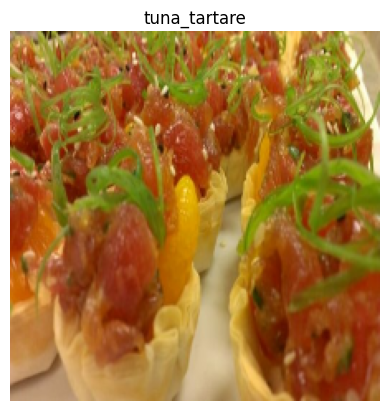

In [ ]:
# Plot the image
import matplotlib.pyplot as plt

plt.imshow(image[0]/255.)
# plt.title(class_names[tf.argmax(label[0])])
plt.title(class_names[label[0]])
plt.axis(False);

In [ ]:
# # prefetch the data
# train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)
# test_data = test_data.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# # Turn on mixed precision training (in case your GPU can support it)
# from tensorflow import mixed_precision
# mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
# # Check if mixed precision trianing is on
# mixed_precision.global_policy()

In [ ]:
# Let's check our prepared datasets
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

## Model create function

In [ ]:
def create_model(input_shape=(224,224,3), output_shape=101, base_model_ver="efficientnet-b0", use_data_augmentation=True,
                 use_batch_normalization=True,
                 use_drop_out=True,
                 top_dropout_rate = 0.2,
                 model_learning_rate=1e-3):
  """
  Creates a model for multi-class classification on food101

  Args:

  Outputs:

  """
  # Create data augmentation layer
  data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal_and_vertical"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    # preprocessing.RandomContrast(0.2),
    # preprocessing.Rescaling(1./255) # rescale images to between 0 & 1, required for models like ResNet50
  ], name="data_augmentation")

  # EfficientNetBX model
  if base_model_ver == "efficientnet-b0":
    base_model = tf.keras.applications.EfficientNetB0(include_top=False)
  elif base_model_ver == "efficientnet-b1":
    base_model = tf.keras.applications.EfficientNetB1(include_top=False)
  elif base_model_ver == "efficientnet-b2":
    base_model = tf.keras.applications.EfficientNetB2(include_top=False)
  elif base_model_ver == "efficientnet-b3":
    base_model = tf.keras.applications.EfficientNetB3(include_top=False)
  elif base_model_ver == "efficientnet-b4":
    base_model = tf.keras.applications.EfficientNetB4(include_top=False)
  elif base_model_ver == "efficientnet-b5":
    base_model = tf.keras.applications.EfficientNetB5(include_top=False)
  elif base_model_ver == "efficientnet-b7":
    base_model = tf.keras.applications.EfficientNetB7(include_top=False)


  base_model.trainable = False

  # BatchNormalization_Layer = tf.keras.layers.BatchNormalization(name="Batch_Normalization_layer")
  # BatchNormalization_Layer.trainable = False

  # Inputs layer
  inputs = tf.keras.layers.Input(shape=input_shape, name="Input_layer")
  # Note: if EfficientNetBX didn't have rescaling build-in
  # x = tf.keras.layers.Rescaling(1./255.)(inputs)

  # Use data augmentation
  if use_data_augmentation:
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
  else:
    x = base_model(inputs, training=False)

  x = tf.keras.layers.GlobalAveragePooling2D(name="Global_Average_Pooling_2D_layer") (x)


  if use_batch_normalization:
    x = tf.keras.layers.BatchNormalization()(x)

  if use_drop_out:
    x = tf.keras.layers.Dropout(top_dropout_rate, name="top_dropout_layer")(x)

  x = tf.keras.layers.Dense(output_shape, name="Dense_layer")(x)

  outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="Softmax_float32_Output_layer")(x)

  model = tf.keras.Model(inputs, outputs)

  # Compile the model
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=model_learning_rate),
                metrics=["accuracy"])

  return model

In [ ]:
# INPUT_SHAPE = (224, 224, 3)
# OUTPUT_SHAPE = len(class_names)

# # EfficientNetB0 model
# base_model = tf.keras.applications.EfficientNetB7(include_top=False)
# # Freeze the base model
# base_model.trainable = False

# # Input model
# inputs = tf.keras.layers.Input(shape=INPUT_SHAPE, name="Input_layer")
# # Note: if EfficientNetBX didn't have rescaling build-in
# # x = tf.keras.layers.Rescaling(1./255.)(inputs)
# x = base_model(inputs, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)
# x = tf.keras.layers.Dense(OUTPUT_SHAPE, name="Dense_layer")(x)
# # Seperate activation of output so we can output float32 activations (in case of using mixed precision)
# outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32_Output_layer")(x)

# model = tf.keras.Model(inputs, outputs)

# # Compile the model
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

## Feature Extraction using EfficientNetBX

### Checking the GPU

It's important to check that your neural network will be trianed on a GPU because training takes much less time on a GPU than a CPU.

And if you want to use mixed precision training, it's required to have a GPU that has a compute compatibility that is 7.0+, check this for more on mixed precision: https://www.tensorflow.org/guide/mixed_precision

In [ ]:
# Check if you're using a GPU
!nvidia-smi

Sun Aug 25 03:25:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050        Off | 00000000:01:00.0 Off |                  N/A |
| N/A   33C    P0              N/A / ERR! |   3541MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

> **Note:** EffiecientNetBX model has rescaling built in therefore we don't need to implement rescaling for the model we're building.

### Creating modelling callbacks

Since we're going to train a big neural network, it is necessay to have callbacks in order to save checkpoints of the model that we can get back to and continue trianing and to have tensorboard callback to plot our models performance using tensorflow board.

Therefore we'll use the following callbacks:
* [`tf.keras.callbacks.TensorBoard()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - keep track of our model training history to analyze it layer. **Note:** can be called from helper_functions.py using `create_tensorboard_callback()`.
* [`tf.keras.callbacks.ModelCheckpoint()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - saves our models progress at several intervals so that we can load it later and without having to retrain it. **Note:** checkpointing is also helpful for fine-tunning our model at a particular epoch and revert it back to a previous state if fine-tunning offers no benefits.

In [ ]:
# Set efficientnet version
efficientnet_ver = "b0"

In [ ]:
# Create model checkpoint to save model's progress
FEATURE_EXTRACT_CHECKPOINT_PATH = f"feature_extract_checkpoints_model_{efficientnet_ver}/cp.ckpt"
feature_extract_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(FEATURE_EXTRACT_CHECKPOINT_PATH,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor="val_loss",
                                                         verbose=0)

### Build feature extraction model

In [ ]:
model = create_model(base_model_ver="efficientnet-"+efficientnet_ver,
                     use_drop_out=True,
                     use_batch_normalization=True,
                     use_data_augmentation=False,
                     top_dropout_rate=0.2,
                     model_learning_rate=1e-4)

In [ ]:
# Check our model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_Average_Pooling_2D_  (None, 1280)              0         
 layer (GlobalAveragePoolin                                      
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 top_dropout_layer (Dropout  (None, 1280)              0     

In [ ]:
# Check the layers (names, trainable, datatype, dtype_policy)
for layer in model.layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

Input_layer float32 <Policy "float32"> True
efficientnetb0 float32 <Policy "float32"> False
Global_Average_Pooling_2D_layer float32 <Policy "float32"> True
batch_normalization float32 <Policy "float32"> True
top_dropout_layer float32 <Policy "float32"> True
Dense_layer float32 <Policy "float32"> True
Softmax_float32_Output_layer float32 <Policy "float32"> True


In [ ]:
# Check the same details for the base model layers
for layer_number, layer in enumerate(model.layers[1].layers):
  print(layer_number, layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

0 input_1 float32 <Policy "float32"> False
1 rescaling float32 <Policy "float32"> False
2 normalization float32 <Policy "float32"> False
3 rescaling_1 float32 <Policy "float32"> False
4 stem_conv_pad float32 <Policy "float32"> False
5 stem_conv float32 <Policy "float32"> False
6 stem_bn float32 <Policy "float32"> False
7 stem_activation float32 <Policy "float32"> False
8 block1a_dwconv float32 <Policy "float32"> False
9 block1a_bn float32 <Policy "float32"> False
10 block1a_activation float32 <Policy "float32"> False
11 block1a_se_squeeze float32 <Policy "float32"> False
12 block1a_se_reshape float32 <Policy "float32"> False
13 block1a_se_reduce float32 <Policy "float32"> False
14 block1a_se_expand float32 <Policy "float32"> False
15 block1a_se_excite float32 <Policy "float32"> False
16 block1a_project_conv float32 <Policy "float32"> False
17 block1a_project_bn float32 <Policy "float32"> False
18 block2a_expand_conv float32 <Policy "float32"> False
19 block2a_expand_bn float32 <Policy 

### Fiting the model

In [ ]:
# Fit the model
FEATURE_EXTRACT_EPOCHS = 15
history_feature_extract = model.fit(train_data,
                                    epochs=FEATURE_EXTRACT_EPOCHS,
                                    steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=int(0.5 * len(test_data)),
                                    callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback",
                                                                           experiment_name=f"feature_extract_efficientnet_{efficientnet_ver}_with_data_augmentation"),
                                               feature_extract_checkpoint_callback])

Saving TensorBoard log files to: tensorboard_callback/feature_extract_efficientnet_b0_with_data_augmentation/20240822-015806
Epoch 1/15


2024-08-22 01:58:14.311739: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-08-22 01:58:14.496323: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-22 01:58:19.535166: I external/local_xla/xla/service/service.cc:168] XLA service 0xa7c55b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-22 01:58:19.535214: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-08-22 01:58:19.547669: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1724306299.666497    3080 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4735/4735 [==============================] - 478s 98ms/step - loss: 2.6306 - accuracy: 0.3830 - val_loss: 1.4827 - val_accuracy: 0.6128
Epoch 2/15
4735/4735 [==============================] - 462s 97ms/step - loss: 1.7092 - accuracy: 0.5668 - val_loss: 1.2612 - val_accuracy: 0.6667
Epoch 3/15
4735/4735 [==============================] - 461s 97ms/step - loss: 1.5043 - accuracy: 0.6151 - val_loss: 1.1683 - val_accuracy: 0.6904
Epoch 4/15
4735/4735 [==============================] - 462s 97ms/step - loss: 1.3880 - accuracy: 0.6413 - val_loss: 1.1193 - val_accuracy: 0.7019
Epoch 5/15
4735/4735 [==============================] - 462s 97ms/step - loss: 1.3128 - accuracy: 0.6605 - val_loss: 1.0839 - val_accuracy: 0.7116
Epoch 6/15
4735/4735 [==============================] - 462s 97ms/step - loss: 1.2522 - accuracy: 0.6706 - val_loss: 1.0614 - val_accuracy: 0.7160
Epoch 7/15
4735/4735 [==============================] - 464s 98ms/step - loss: 1.2097 - accuracy: 0.6812 - val_loss: 1.0472 - val

In [ ]:
# Evaluate the model on all the test data
feature_extract_results_model = model.evaluate(test_data)
feature_extract_results_model

1579/1579 [==============================] - 134s 85ms/step - loss: 0.9635 - accuracy: 0.7385


[0.9635376930236816, 0.7385346293449402]

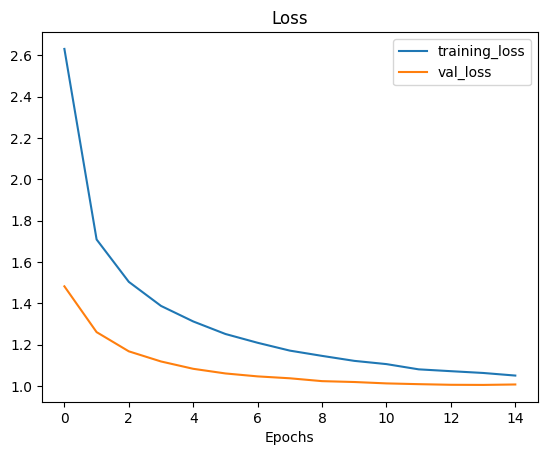

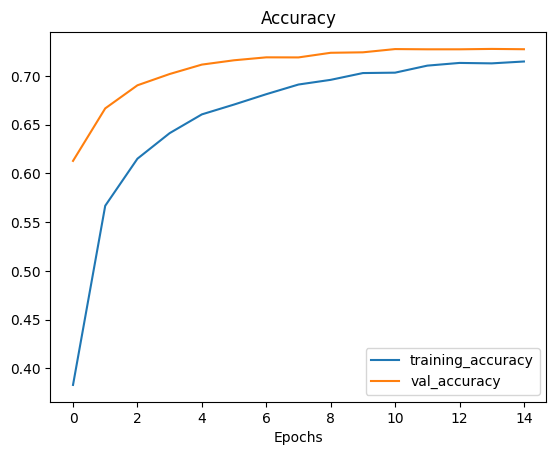

In [ ]:
# Plot loss curves
plot_loss_curves(history_feature_extract)

### Save the feature extraction model

In [ ]:
# save the model
PATH_TO_SAVED_FEATURE_EXTRACT_MODEL = f"feature_extract_saved_model_{efficientnet_ver}"
model.save(filepath=PATH_TO_SAVED_FEATURE_EXTRACT_MODEL)

INFO:tensorflow:Assets written to: feature_extract_saved_model_b0/assets


INFO:tensorflow:Assets written to: feature_extract_saved_model_b0/assets


In [ ]:
# load the saved model
feature_extract_loaded_model = tf.keras.models.load_model(PATH_TO_SAVED_FEATURE_EXTRACT_MODEL)

In [ ]:
# Check the loaded model performance
feature_extract_results_loaded_model = feature_extract_loaded_model.evaluate(test_data)
feature_extract_results_loaded_model

1579/1579 [==============================] - 135s 85ms/step - loss: 0.9635 - accuracy: 0.7385


[0.9635376930236816, 0.7385346293449402]

In [ ]:
# Compare the loaded model results with the feature extraction model
import numpy as np

np.isclose(np.array(feature_extract_results_loaded_model), np.array(feature_extract_results_model))

array([ True,  True])

In [ ]:
model.load_weights(FEATURE_EXTRACT_CHECKPOINT_PATH)

In [ ]:
feature_extract_results_ckeckpoint_model = model.evaluate(test_data)
feature_extract_results_ckeckpoint_model

1579/1579 [==============================] - 132s 83ms/step - loss: 0.9651 - accuracy: 0.7373


[0.9651237726211548, 0.7373465299606323]

In [ ]:
# Compare the loaded model results with the feature extraction model
import numpy as np

np.isclose(np.array(feature_extract_results_ckeckpoint_model), np.array(feature_extract_results_model))

array([False, False])

In [ ]:
history_feature_extract.epoch[-1]

14

## Fine-tunning EfficientNetBX

To fine-tune the model we will unfreeze the last layers and continue training from where we left off

### Unfreezing layers for fine-tunning
- The batch normalization layers needs to be kept frozen.
- Each block needs to be all turned on or off. This is because the architecture includes a shortcut from the first layer to the last layer for each block. Not respecting blocks also significantly harms the final performance.

Check: https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/



In [ ]:
# Unfreeze the base model
model.layers[1].trainable = True

# Keep only the last 2 blocks unfrozen => the last 75 layers,
# number_of_unfrozen_layers = 75
# for layer in model.layers[1].layers[:-number_of_unfrozen_layers]:
#   layer.trainable = False

# Unfreeze the whole model
for layer in model.layers[1].layers:
  layer.trainable = True

# Keep the batch normalization layers frozen
for layer in model.layers[1].layers:
  if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

### Create modeling callbacks

In [ ]:
# Setup early stopping callback if the model doesn't improve for 6 epochs
PATIENCE_EPOCHS = 6
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=PATIENCE_EPOCHS, verbose=1)
FINE_TUNE_MODEL_CHECKPOINTS_PATH = f"fine_tune_checkpoints_model_{efficientnet_ver}/cp.ckpt"
fine_tune_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(FINE_TUNE_MODEL_CHECKPOINTS_PATH,
                                                                     save_weights_only=True,
                                                                     save_best_only=True,
                                                                     monitor="val_loss",
                                                                     verbose=0)

In [ ]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.5, # multiply the learning rate by 0.5 (reduce by 2x)
                                                 patience=3,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-8)

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # learning_rate lowered by 10x
              metrics=["accuracy"])

In [ ]:
# Check the model layers
for layer in model.layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

Input_layer float32 <Policy "float32"> True
efficientnetb0 float32 <Policy "float32"> True
Global_Average_Pooling_2D_layer float32 <Policy "float32"> True
batch_normalization float32 <Policy "float32"> True
top_dropout_layer float32 <Policy "float32"> True
Dense_layer float32 <Policy "float32"> True
Softmax_float32_Output_layer float32 <Policy "float32"> True


In [ ]:
# Check the base model layers
for layer_number, layer in enumerate(model.layers[1].layers):
  print(layer_number ,layer.name, layer.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 rescaling_1 True
4 stem_conv_pad True
5 stem_conv True
6 stem_bn False
7 stem_activation True
8 block1a_dwconv True
9 block1a_bn False
10 block1a_activation True
11 block1a_se_squeeze True
12 block1a_se_reshape True
13 block1a_se_reduce True
14 block1a_se_expand True
15 block1a_se_excite True
16 block1a_project_conv True
17 block1a_project_bn False
18 block2a_expand_conv True
19 block2a_expand_bn False
20 block2a_expand_activation True
21 block2a_dwconv_pad True
22 block2a_dwconv True
23 block2a_bn False
24 block2a_activation True
25 block2a_se_squeeze True
26 block2a_se_reshape True
27 block2a_se_reduce True
28 block2a_se_expand True
29 block2a_se_excite True
30 block2a_project_conv True
31 block2a_project_bn False
32 block2b_expand_conv True
33 block2b_expand_bn False
34 block2b_expand_activation True
35 block2b_dwconv True
36 block2b_bn False
37 block2b_activation True
38 block2b_se_squeeze True
39 block2b_se_reshape True
40 blo

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_Average_Pooling_2D_  (None, 1280)              0         
 layer (GlobalAveragePoolin                                      
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 top_dropout_layer (Dropout  (None, 1280)              0     

### Fit the model

In [ ]:
# Fit the model
FINE_TUNE_EPOCHS = 25
history_fine_tune = model.fit(train_data,
                              epochs=FINE_TUNE_EPOCHS,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.75 * len(test_data)),
                              # initial_epoch=history_feature_extract.epoch[-1],
                              initial_epoch=14,
                              callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback",
                                                                    experiment_name=f"fine_tune_efficientnet_{efficientnet_ver}_with_data_augmentation"),
                                        early_stopping_callback,
                                        fine_tune_checkpoint_callback,
                                        reduce_lr
                                         ]
                              )

Saving TensorBoard log files to: tensorboard_callback/fine_tune_efficientnet_b0_with_data_augmentation/20240822-040234
Epoch 15/25
4735/4735 [==============================] - 1730s 360ms/step - loss: 0.9516 - accuracy: 0.7429 - val_loss: 0.8363 - val_accuracy: 0.7714 - lr: 1.0000e-05
Epoch 16/25
4735/4735 [==============================] - 1652s 349ms/step - loss: 0.8403 - accuracy: 0.7719 - val_loss: 0.7904 - val_accuracy: 0.7836 - lr: 1.0000e-05
Epoch 17/25
4735/4735 [==============================] - 1653s 349ms/step - loss: 0.7624 - accuracy: 0.7917 - val_loss: 0.7686 - val_accuracy: 0.7883 - lr: 1.0000e-05
Epoch 18/25
4735/4735 [==============================] - 1653s 349ms/step - loss: 0.6967 - accuracy: 0.8085 - val_loss: 0.7487 - val_accuracy: 0.7948 - lr: 1.0000e-05
Epoch 19/25
4735/4735 [==============================] - 1653s 349ms/step - loss: 0.6369 - accuracy: 0.8243 - val_loss: 0.7336 - val_accuracy: 0.8006 - lr: 1.0000e-05
Epoch 20/25
4735/4735 [=======================

In [ ]:
# Evaluate the model
fine_tune_results = model.evaluate(test_data)
fine_tune_results

1579/1579 [==============================] - 131s 83ms/step - loss: 0.7119 - accuracy: 0.8067


[0.7118711471557617, 0.8066930770874023]

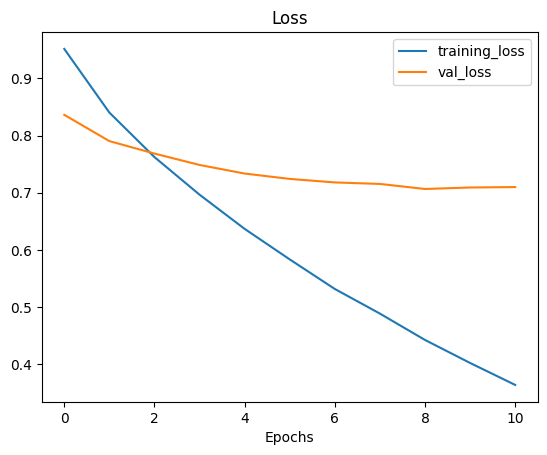

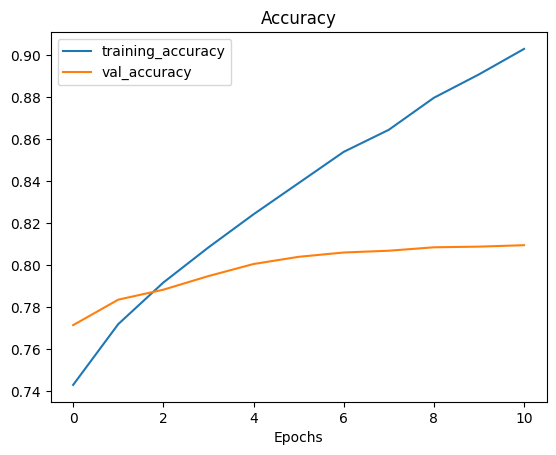

In [ ]:
plot_loss_curves(history_fine_tune)

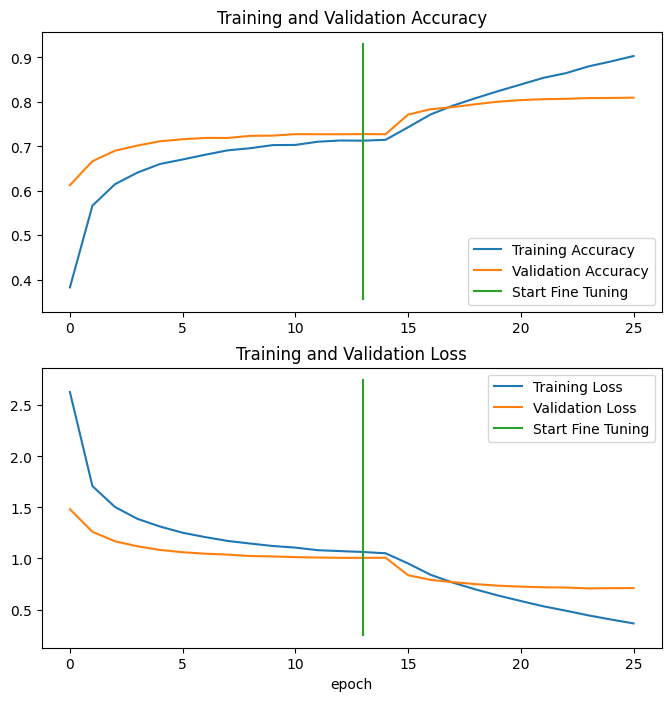

In [ ]:
# Compare histories before and after fine-tunning
compare_historys(history_feature_extract, history_fine_tune, initial_epochs=14)

### Saving the fine-tunning model

In [ ]:
# Define Path to save the model
PATH_TO_SAVED_FINE_TUNE_MODEL = f"fine_tune_saved_model_{efficientnet_ver}"

In [ ]:
# Save the model
model.save(filepath=PATH_TO_SAVED_FINE_TUNE_MODEL)

INFO:tensorflow:Assets written to: fine_tune_saved_model_b0/assets


INFO:tensorflow:Assets written to: fine_tune_saved_model_b0/assets


In [ ]:
# Load the fine tune model
fine_tune_loaded_model = tf.keras.models.load_model(PATH_TO_SAVED_FINE_TUNE_MODEL)

In [ ]:
# Evaluate the loaded model
fine_tune_results_loaded_model = fine_tune_loaded_model.evaluate(test_data)
fine_tune_results_loaded_model

2024-08-25 03:28:34.193930: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-08-25 03:28:34.374764: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1579/1579 [==============================] - 142s 86ms/step - loss: 0.7119 - accuracy: 0.8067


[0.7118711471557617, 0.8066930770874023]

In [ ]:
# Compare the performance of the loaded model with the fine tuned model
np.isclose(np.array(fine_tune_results_loaded_model), np.array(fine_tune_results))

array([ True,  True])

In [ ]:
# load fine-tuned model from check point
model.load_weights(FINE_TUNE_MODEL_CHECKPOINTS_PATH)

In [ ]:
# Evaluate the loaded model from checkpoint
fine_tune_results_ckeckpoint_model = model.evaluate(test_data)
fine_tune_results_ckeckpoint_model

1579/1579 [==============================] - 132s 83ms/step - loss: 0.7120 - accuracy: 0.8038


[0.7120489478111267, 0.8037623763084412]

## Making predictions with our model

In [ ]:
preds_probs = fine_tune_loaded_model.predict(test_data, verbose=1)

1579/1579 [==============================] - 130s 81ms/step


In [ ]:
len(test_data)

1579

In [ ]:
# How many predictions do we have?
len(preds_probs)

25250

In [ ]:
# What's the shape of the predctions
preds_probs.shape

(25250, 101)

In [ ]:
# How the first predction looks like
preds_probs[0]

array([3.36330906e-02, 3.03196895e-04, 1.31043531e-02, 4.47894718e-06,
       8.69696123e-06, 1.19423712e-04, 1.86565856e-04, 9.89997534e-06,
       8.96387617e-04, 3.79660851e-05, 9.05813340e-06, 1.36551133e-03,
       3.91510170e-04, 1.44560516e-07, 1.73541295e-04, 2.65811337e-03,
       4.38447132e-05, 1.49190482e-05, 2.27053431e-04, 2.91075094e-06,
       7.13623944e-04, 1.12225973e-06, 1.49661046e-05, 1.73500346e-04,
       3.42563813e-04, 9.35072079e-04, 8.21456342e-06, 7.31452601e-05,
       6.38842757e-04, 4.50042398e-06, 1.21540069e-07, 2.06028217e-05,
       5.27101848e-03, 1.16205413e-03, 2.08250749e-05, 1.86039237e-04,
       4.61295247e-04, 1.13134174e-05, 1.23838391e-02, 1.81741678e-04,
       1.80349301e-03, 1.69242587e-04, 5.34570863e-05, 5.05794105e-06,
       1.63439196e-03, 3.79675184e-04, 6.85772509e-04, 3.21541411e-05,
       4.32420959e-04, 3.36547755e-02, 3.69890768e-05, 6.59280850e-05,
       3.08617651e-01, 6.30624359e-03, 4.25624712e-05, 1.29368417e-02,
      

In [ ]:
# We get one prediction probability per class (in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilities for the first test case: {len(preds_probs[0])}")
print(f"Sum of all prediction probabilities for the first test case: {sum(preds_probs[0])}")
print(f"Shape of prediction probability for the first test case:\n {preds_probs[0].shape}")
print(f"The class index with the highest predicted probability by the model for the first test case: {tf.argmax(preds_probs[0])}")
print(f"The highest predicted probability by the model for the first test case: {preds_probs[0][tf.argmax(preds_probs[0])]}")

Number of prediction probabilities for the first test case: 101
Sum of all prediction probabilities for the first test case: 1.0000000824029769
Shape of prediction probability for the first test case:
 (101,)
The class index with the highest predicted probability by the model for the first test case: 85
The highest predicted probability by the model for the first test case: 0.4446883797645569


In [ ]:
test_data.class_names[tf.argmax(preds_probs[0])]

'samosa'

In [ ]:
# Get the class predictions
y_preds = preds_probs.argmax(axis=1)
y_preds[:10]

array([85,  0,  0,  0,  0,  0, 21,  0,  2, 41])

In [ ]:
# How many predictions do we have?
len(y_preds)

25250

In [ ]:
# To get our test labels we need to unravel our test_data BatchDataset
# we want to:
# 1. Unbatch our test data
# 2. Retreive our labels from the data set
y_true = np.array([])
for image, label_batch in test_data:
  # y_labels = np.append(y_labels, label_batch.numpy().argmax(axis=1)) # Currently test labels look like: [0, 0, 0, 1, 0, 0, ..., 0, 0], we want the index value where the "1" occurs
  # y_labels = np.append(y_labels, label_batch.numpy().argmax()) # Currently test labels look like: [0, 0, 0, 1, 0, 0, ..., 0, 0], we want the index value where the "1" occurs
  y_true = np.append(y_true, label_batch.numpy())
  # print(label_batch)


In [ ]:
y_true[:10] # Look at the first 10 elements

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# How many y_labels do we have?
len(y_true)

25250

In [ ]:
type(y_preds[0])

numpy.int64

In [ ]:
type(y_true[0])

numpy.float64

In [ ]:
y_true = y_true.astype(np.int64)

In [ ]:
type(y_true[0])

numpy.int64

In [ ]:
y_true[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_true_list = list(y_true)
y_preds_list = list(y_preds)

## Evaluating the trained model

### Finding the precision, recall, F1-score for each class

* Precision, `precision = tp / (tp + fp)`, The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. For more details, check: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
* F1-score,

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_precision = precision_score(y_true_list,
                                  y_preds_list, average=None)

model_recall = recall_score(y_true=y_true_list,
                            y_pred=y_preds_list, average=None)

model_f1_score = f1_score(y_true=y_true_list,
                          y_pred=y_preds_list, average=None)

model_precision.shape, model_recall.shape, model_f1_score.shape

((101,), (101,), (101,))

In [ ]:
model_precision

array([0.61983471, 0.80314961, 0.79259259, 0.8037037 , 0.78318584,
       0.73140496, 0.85603113, 0.85555556, 0.71291866, 0.77446809,
       0.77192982, 0.81060606, 0.8685259 , 0.76136364, 0.77431907,
       0.67916667, 0.82539683, 0.68695652, 0.732     , 0.84745763,
       0.88617886, 0.72653061, 0.60507246, 0.91322314, 0.89878543,
       0.82022472, 0.73790323, 0.8515625 , 0.83266932, 0.86486486,
       0.90983607, 0.86290323, 0.91020408, 0.98406375, 0.89583333,
       0.83657588, 0.79012346, 0.66      , 0.8458498 , 0.60944206,
       0.87593985, 0.82352941, 0.74703557, 0.81992337, 0.82677165,
       0.89453125, 0.75581395, 0.68110236, 0.80658436, 0.72177419,
       0.70967742, 0.88582677, 0.84897959, 0.83127572, 0.92063492,
       0.87548638, 0.74162679, 0.76890756, 0.79012346, 0.75102041,
       0.8503937 , 0.88888889, 0.83842795, 0.948     , 0.88461538,
       0.89641434, 0.80932203, 0.73705179, 0.8972332 , 0.92857143,
       0.8125    , 0.84297521, 0.84126984, 0.7421875 , 0.88034

In [ ]:
model_recall

array([0.6  , 0.816, 0.856, 0.868, 0.708, 0.708, 0.88 , 0.924, 0.596,
       0.728, 0.704, 0.856, 0.872, 0.804, 0.796, 0.652, 0.832, 0.632,
       0.732, 0.8  , 0.872, 0.712, 0.668, 0.884, 0.888, 0.876, 0.732,
       0.872, 0.836, 0.896, 0.888, 0.856, 0.892, 0.988, 0.86 , 0.86 ,
       0.768, 0.66 , 0.856, 0.568, 0.932, 0.84 , 0.756, 0.856, 0.84 ,
       0.916, 0.78 , 0.692, 0.784, 0.716, 0.704, 0.9  , 0.832, 0.808,
       0.928, 0.9  , 0.62 , 0.732, 0.768, 0.736, 0.864, 0.864, 0.768,
       0.948, 0.92 , 0.9  , 0.764, 0.74 , 0.908, 0.936, 0.936, 0.816,
       0.848, 0.76 , 0.824, 0.928, 0.88 , 0.616, 0.888, 0.836, 0.844,
       0.836, 0.58 , 0.848, 0.732, 0.788, 0.892, 0.696, 0.904, 0.756,
       0.892, 0.948, 0.808, 0.592, 0.812, 0.824, 0.772, 0.892, 0.776,
       0.64 , 0.864])

In [ ]:
model_f1_score

array([0.6097561 , 0.80952381, 0.82307692, 0.83461538, 0.74369748,
       0.7195122 , 0.8678501 , 0.88846154, 0.64923747, 0.75051546,
       0.73640167, 0.83268482, 0.87025948, 0.78210117, 0.78500986,
       0.66530612, 0.82868526, 0.65833333, 0.732     , 0.82304527,
       0.87903226, 0.71919192, 0.63498099, 0.89837398, 0.89336016,
       0.84719536, 0.73493976, 0.86166008, 0.83433134, 0.88015717,
       0.89878543, 0.85943775, 0.9010101 , 0.98602794, 0.87755102,
       0.84812623, 0.77890467, 0.66      , 0.85089463, 0.58799172,
       0.90310078, 0.83168317, 0.75149105, 0.83757339, 0.83333333,
       0.90513834, 0.76771654, 0.68650794, 0.79513185, 0.7188755 ,
       0.70682731, 0.89285714, 0.84040404, 0.81947262, 0.92430279,
       0.88757396, 0.67538126, 0.75      , 0.77890467, 0.74343434,
       0.85714286, 0.87626775, 0.80167015, 0.948     , 0.90196078,
       0.89820359, 0.78600823, 0.73852295, 0.90258449, 0.93227092,
       0.86988848, 0.82926829, 0.84462151, 0.75098814, 0.85123

### Building a confusion matrix

This code can be found at: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

Some modifications were made to the code during the course to make it fit the 101 classes we have 😀

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ## Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

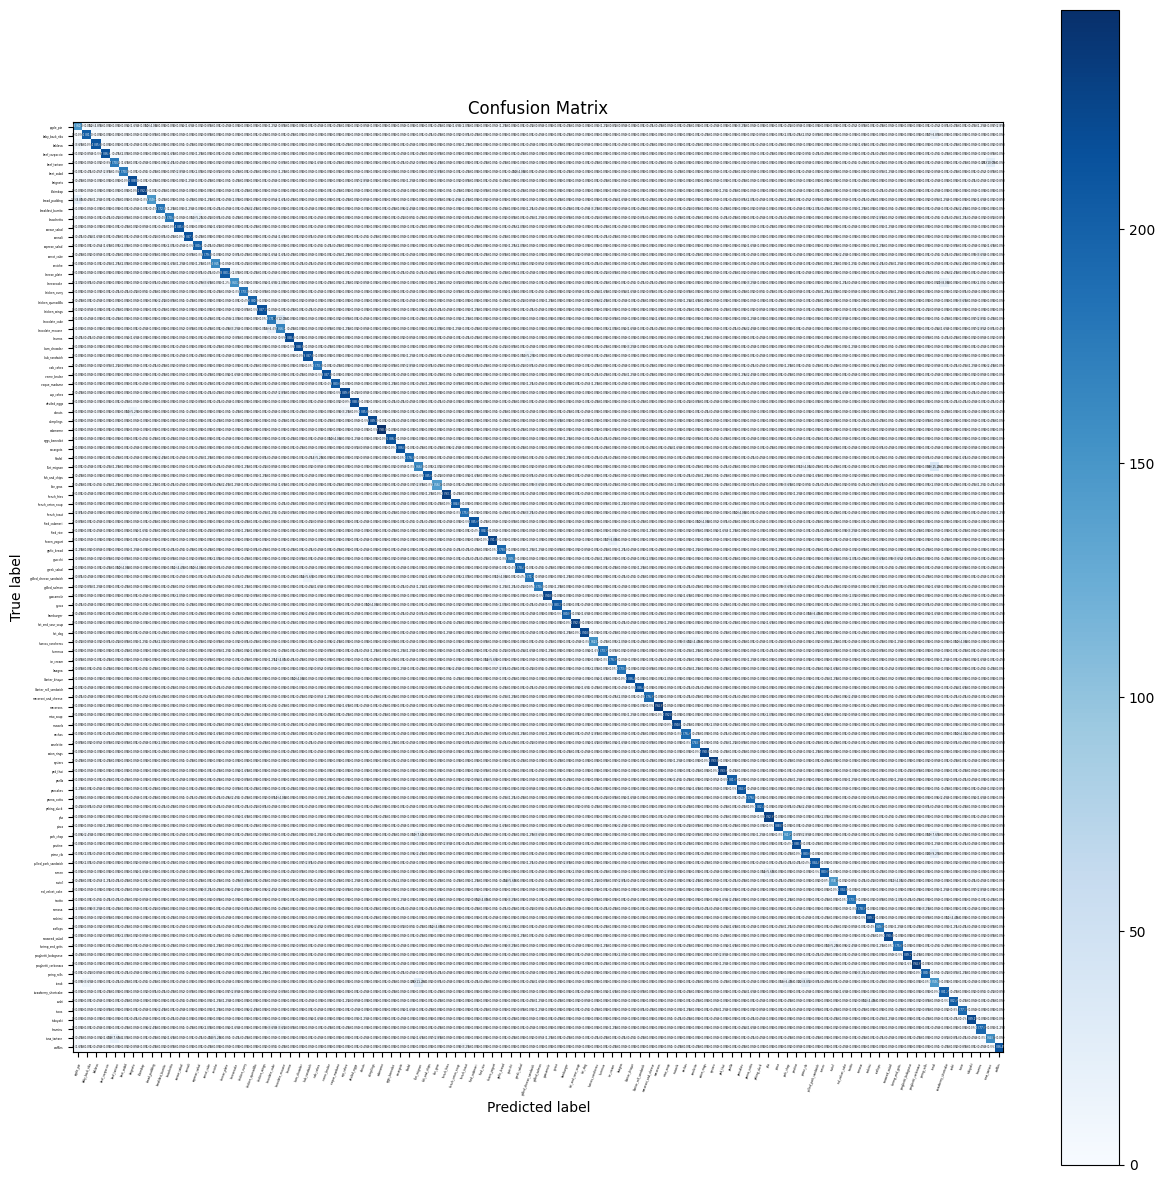

In [ ]:
make_confusion_matrix(y_true=y_labels, y_pred=preds_classes, classes=class_names, figsize=(15, 15), text_size=2, norm=True, savefig=False)

### Finding the models most wrong predictions (highest prediction probability but the wrong prediction)

In [ ]:
# Get the paths of all the images in the test dataset
img_paths = []
for img_path in test_data.list_files(f"{test_dir}/*/*", shuffle=False):
  img_paths.append(img_path.numpy().decode('utf-8'))

img_paths[:10]

['/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/apple_pie/1011328.jpg',
 '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/apple_pie/101251.jpg',
 '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/apple_pie/1034399.jpg',
 '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/apple_pie/103801.jpg',
 '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/apple_pie/1038694.jpg',
 '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/apple_pie/1047447.jpg',
 '/home/esmaeel-hi/colab_directory/tensorflow_course/07_milestone_project_1_food_vision/food101_train_test/test/apple_pie/1068632.jpg',
 '/home/esmaeel-hi/colab_directory/tensorflow_cour

In [ ]:
# Get predictions probabitilies for each class
preds_conf = preds_probs.max(axis=1)
preds_conf[:10]

array([0.44468838, 0.99846613, 0.56085825, 0.8278533 , 0.99173564,
       0.48743793, 0.40294456, 0.936952  , 0.9092916 , 0.9934075 ],
      dtype=float32)

In [ ]:
# Get the class names for the predictions and the true labels
preds_classnames_list = [class_names[i] for i in y_preds_list]
true_classnames_list = [class_names[i] for i in y_true_list]

In [ ]:
pred_correct = []
for i in range(len(y_preds_list)):
  pred_correct.append(y_preds_list[i] == y_true_list[i])

In [ ]:
len(y_preds_list), len(preds_conf), len(y_true_list), len(pred_is_true_list), len(preds_classnames_list), len(true_classnames_list), len(img_paths)

(25250, 25250, 25250, 25250, 25250, 25250, 25250)

In [ ]:
import pandas as pd

preds_df = pd.DataFrame({"y_preds":y_preds_list,
                         "preds_conf": preds_conf,
                         "y_true": y_true_list,
                         "preds_correct": pred_correct,
                         "y_true_classnames": preds_classnames_list,
                         "y_preds_classnames": true_classnames_list,
                         "image_path": img_paths})
preds_df

,y_preds,preds_conf,y_true,preds_correct,y_true_classnames,y_preds_classnames,image_path
0,85,0.444688,0,False,samosa,apple_pie,/home/esmaeel-hi/colab_directory/tensorflow_co...
1,0,0.998466,0,True,apple_pie,apple_pie,/home/esmaeel-hi/colab_directory/tensorflow_co...
2,0,0.560858,0,True,apple_pie,apple_pie,/home/esmaeel-hi/colab_directory/tensorflow_co...
3,0,0.827853,0,True,apple_pie,apple_pie,/home/esmaeel-hi/colab_directory/tensorflow_co...
4,0,0.991736,0,True,apple_pie,apple_pie,/home/esmaeel-hi/colab_directory/tensorflow_co...
...,...,...,...,...,...,...,...
25245,100,0.999983,100,True,waffles,waffles,/home/esmaeel-hi/colab_directory/tensorflow_co...
25246,100,0.967438,100,True,waffles,waffles,/home/esmaeel-hi/colab_directory/tensorflow_co...
25247,100,0.878911,100,True,waffles,waffles,/home/esmaeel-hi/colab_directory/tensorflow_co...
25248,100,0.920455,100,True,waffles,waffles,/home/esmaeel-hi/colab_directory/tensorflow_co...


In [ ]:
# Sort the data frame to have the most worst predictions at the top
worst_100_predictions = preds_df[preds_df["preds_correct"] == False].sort_values("preds_conf", ascending=False)[:100]
worst_100_predictions.head(20)

,y_preds,preds_conf,y_true,preds_correct,y_true_classnames,y_preds_classnames,image_path
11642,10,0.999786,46,False,bruschetta,garlic_bread,/home/esmaeel-hi/colab_directory/tensorflow_co...
9326,79,0.999770,37,False,prime_rib,filet_mignon,/home/esmaeel-hi/colab_directory/tensorflow_co...
11150,2,0.999656,44,False,baklava,fried_rice,/home/esmaeel-hi/colab_directory/tensorflow_co...
14035,66,0.999474,56,False,nachos,huevos_rancheros,/home/esmaeel-hi/colab_directory/tensorflow_co...
8664,86,0.999449,34,False,sashimi,eggs_benedict,/home/esmaeel-hi/colab_directory/tensorflow_co...
4347,83,0.999400,17,False,red_velvet_cake,cheesecake,/home/esmaeel-hi/colab_directory/tensorflow_co...
3509,29,0.999317,14,False,cup_cakes,carrot_cake,/home/esmaeel-hi/colab_directory/tensorflow_co...
10880,68,0.999249,43,False,onion_rings,fried_calamari,/home/esmaeel-hi/colab_directory/tensorflow_co...
2046,41,0.999187,8,False,french_onion_soup,bread_pudding,/home/esmaeel-hi/colab_directory/tensorflow_co...
14719,94,0.999167,58,False,strawberry_shortcake,ice_cream,/home/esmaeel-hi/colab_directory/tensorflow_co...


In [ ]:
def load_and_prepare_image(img_path, IMG_SHAPE=224, scale=True):
  img = tf.io.read_file(img_path)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [IMG_SHAPE, IMG_SHAPE])

  if scale:
    return img/255.
  else:
    return img

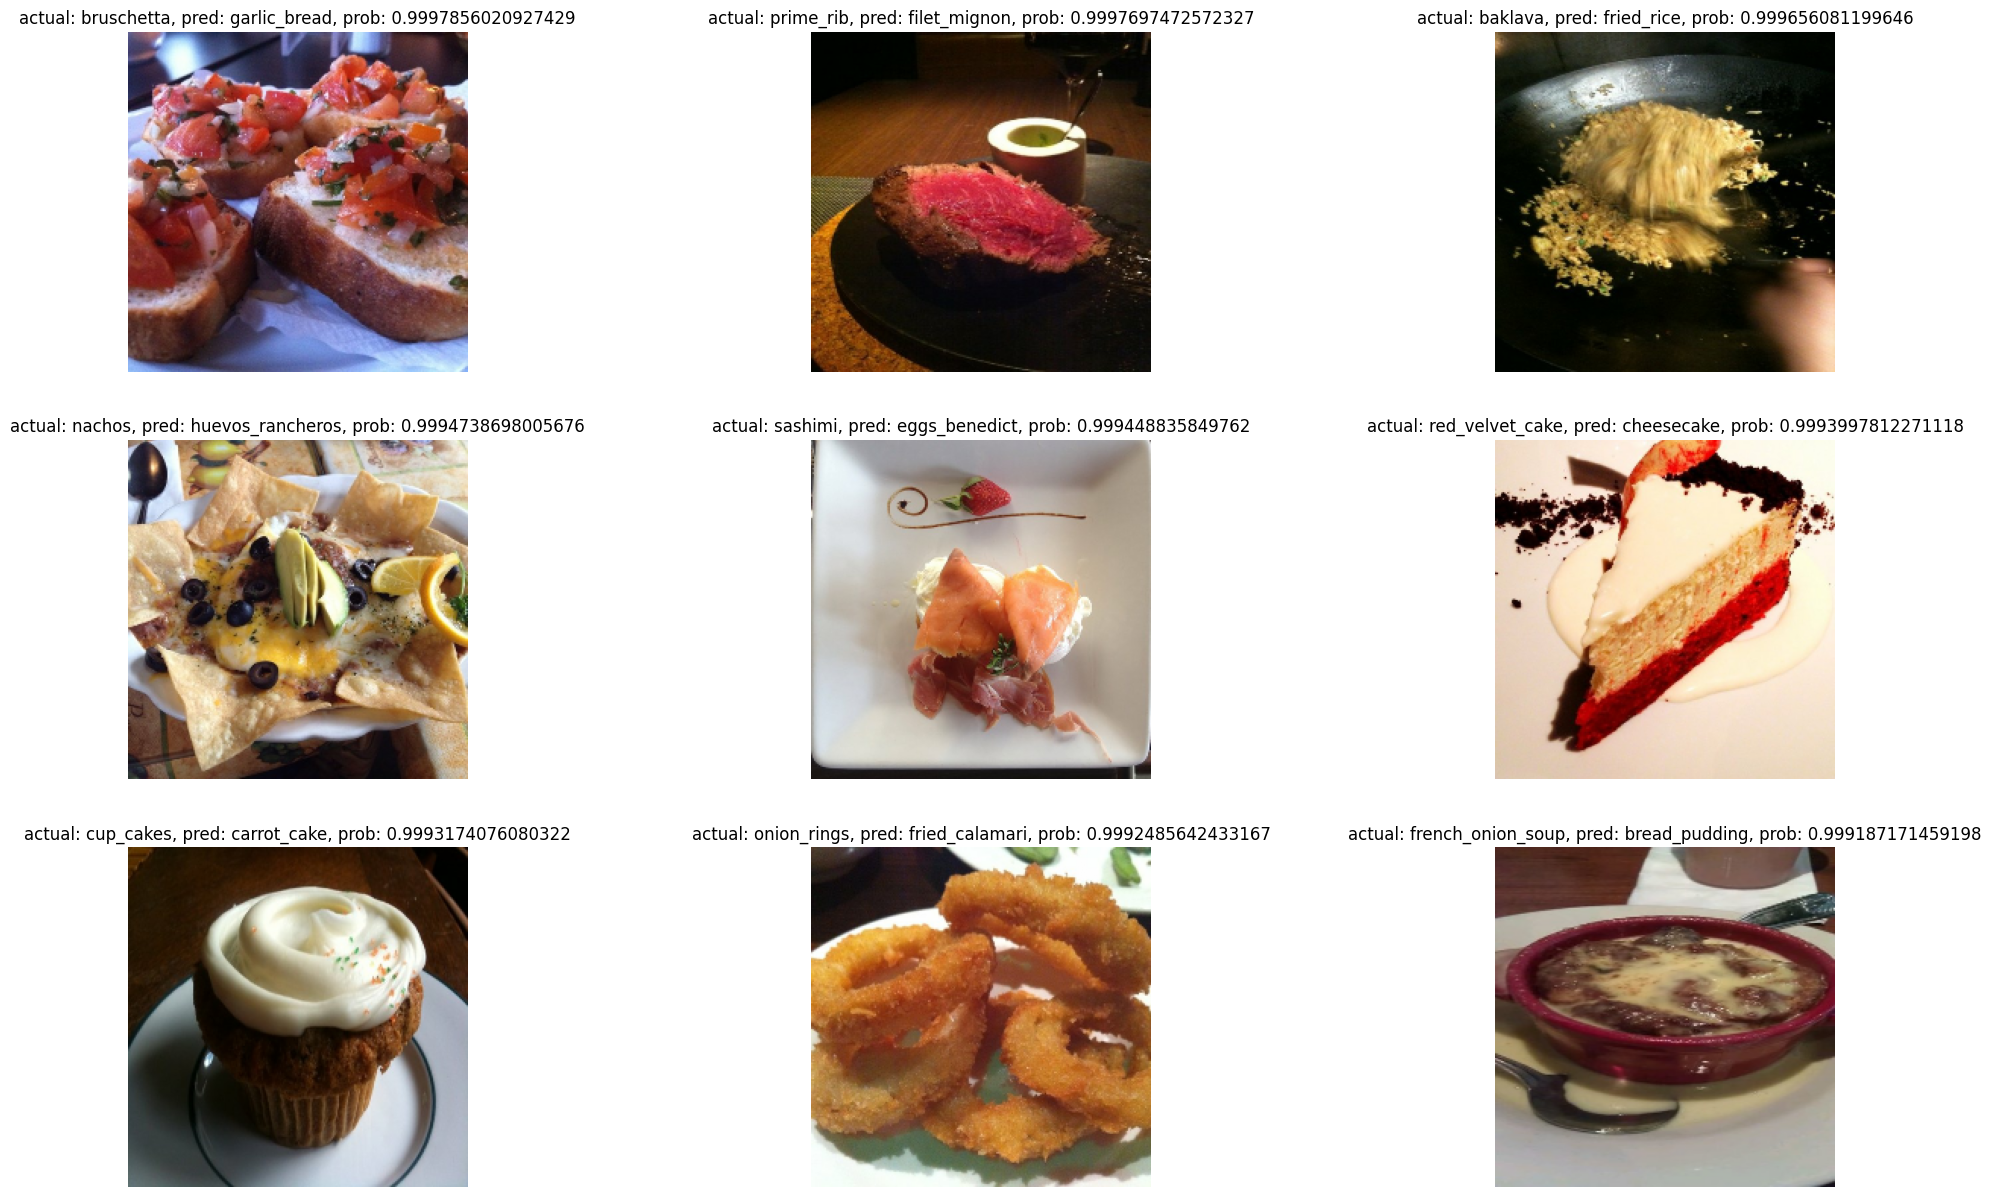

In [ ]:
# View 9 images of the worst predictions
num_images_to_view = 9
start_index = 0

plt.figure(figsize=(25,15))
for i, row in enumerate(worst_100_predictions[start_index:num_images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_prepare_image(row[-1])
  pred_class_name = row[-2]
  true_class_name = row[-3]
  pred_conf = row[2]
  plt.imshow(img)
  plt.title(f"actual: {true_class_name}, pred: {pred_class_name}, prob: {pred_conf}")
  plt.axis(False);